In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Iris = load_iris()

In [5]:
print(Iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
df = pd.DataFrame(Iris.data, columns=Iris.feature_names)
data_class = Iris.target
data = df[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [10]:
lda.coef_ #Коэф дискриминантных линий

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


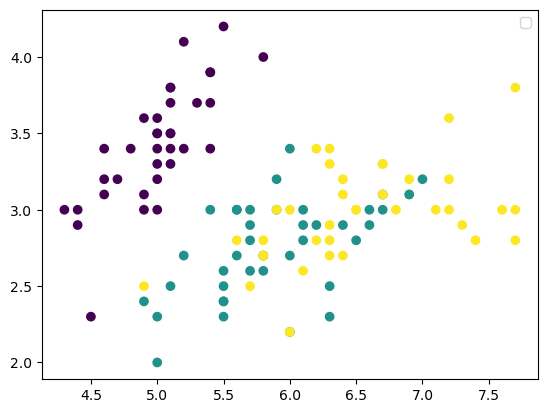

In [11]:
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)
plt.legend()
plt.show()

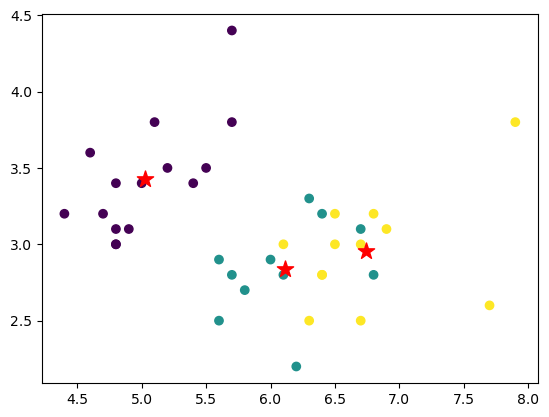

In [14]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(X_test, y_test)
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_test) # Тестовая выборка 
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

C:\Users\Павел\AppData\Local\Temp\ipykernel_5088\4231444570.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='autumn', s=60)


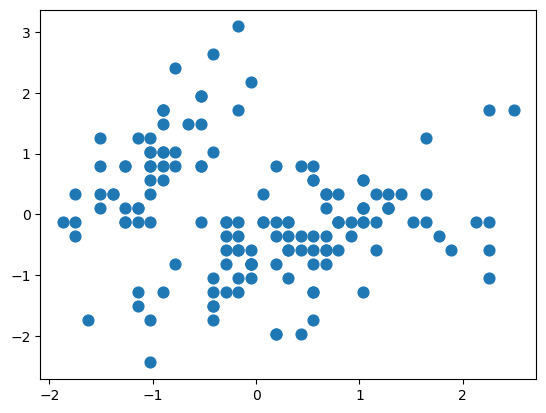

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(df)
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='autumn', s=60)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\a

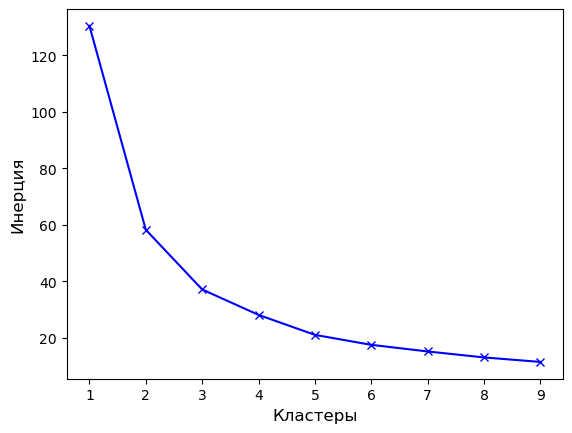

In [21]:
#k-means и инерция, способ выбрал как на лекции
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num,  random_state=42)
    k_means.fit(data)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, data))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


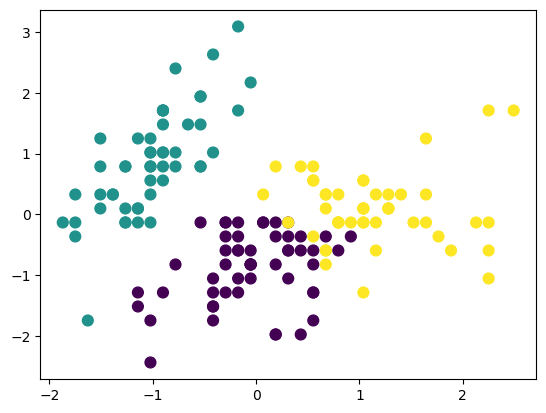

In [22]:
kmeans = KMeans(n_clusters=3) #Судя по графику оптимальное число кластеров 3 
clusters = kmeans.fit_predict(iris_scaled)
clusters
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='viridis', c=clusters, s=60)